In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from math import log2
import seaborn as sns

In [28]:
light_blue = Image.open('/Users/calvinatkins/Downloads/light_blue.jpeg')
orange = Image.open('/Users/calvinatkins/Downloads/orange.jpeg')
red = Image.open('/Users/calvinatkins/Downloads/red.jpeg')
turquoise = Image.open('/Users/calvinatkins/Downloads/turquoise.jpeg')
sage = Image.open('/Users/calvinatkins/Downloads/sage.jpeg')

In [29]:
# Testing to see if I can get similar values by other histograms I created
# can also test entropy of certain channels: red channel for ex
# grayscale is done to convert the image to a single channel for simplification

In [30]:
def calculate_entropy(channel):
    histogram = np.histogram(channel, bins=256, range=(0, 255))[0]
    hist_normalized = histogram / float(np.sum(histogram))
    entropy = -np.sum(hist_normalized * np.log2(hist_normalized + np.finfo(float).eps))
    return entropy

def calculate_channel_entropies(image):
    # Split image into RGB channels
    red_channel, green_channel, blue_channel = image.split()

    red_entropy = calculate_entropy(red_channel)
    green_entropy = calculate_entropy(green_channel)
    blue_entropy = calculate_entropy(blue_channel)

    print("Red Channel Entropy:", red_entropy)
    print("Green Channel Entropy:", green_entropy)
    print("Blue Channel Entropy:", blue_entropy)

print("Orange")
calculate_channel_entropies(orange)
print("Light Blue")
calculate_channel_entropies(light_blue)
print("Red")
calculate_channel_entropies(red)
print("Turquoise")
calculate_channel_entropies(turquoise)
print("Green")
calculate_channel_entropies(green)

Orange
Red Channel Entropy: 6.757419445124871
Green Channel Entropy: 6.916514807184205
Blue Channel Entropy: 6.650764129471522
Light Blue
Red Channel Entropy: 6.242466794361341
Green Channel Entropy: 6.048691287353764
Blue Channel Entropy: 6.352955993905189
Red
Red Channel Entropy: 6.265066472505103
Green Channel Entropy: 7.162446484540307
Blue Channel Entropy: 7.003592040802523
Turquoise
Red Channel Entropy: 7.251090418687386
Green Channel Entropy: 7.276450720184872
Blue Channel Entropy: 7.416112921177779
Green
Red Channel Entropy: 7.024015974480801
Green Channel Entropy: 6.566294475401054
Blue Channel Entropy: 6.75972953385067


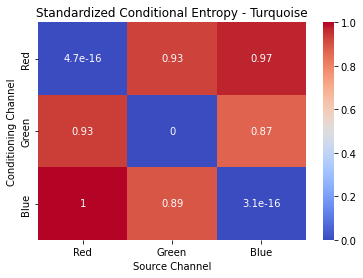

In [41]:
def calculate_joint_entropy(channel1, channel2):
    histogram_2d, _, _ = np.histogram2d(channel1.flatten(), channel2.flatten(), bins=(256, 256), range=[[0, 256], [0, 256]])
    hist_normalized = histogram_2d / float(np.sum(histogram_2d))
    entropy = -np.sum(hist_normalized * np.log2(hist_normalized + np.finfo(float).eps))
    return entropy

def calculate_conditional_entropy(channel1, channel2):
    joint_entropy = calculate_joint_entropy(channel1, channel2)
    entropy_channel2 = calculate_entropy(channel2)
    conditional_entropy = joint_entropy - entropy_channel2
    return conditional_entropy

# example
image = turquoise

red_channel, green_channel, blue_channel = image.split()

# convert channels to numpy arrays
red_array = np.array(red_channel)
green_array = np.array(green_channel)
blue_array = np.array(blue_channel)

conditional_entropy_matrix = np.zeros((3, 3))
conditional_entropy_matrix[0, 0] = calculate_conditional_entropy(red_array, red_array)
conditional_entropy_matrix[0, 1] = calculate_conditional_entropy(red_array, green_array)
conditional_entropy_matrix[0, 2] = calculate_conditional_entropy(red_array, blue_array)
conditional_entropy_matrix[1, 0] = calculate_conditional_entropy(green_array, red_array)
conditional_entropy_matrix[1, 1] = calculate_conditional_entropy(green_array, green_array)
conditional_entropy_matrix[1, 2] = calculate_conditional_entropy(green_array, blue_array)
conditional_entropy_matrix[2, 0] = calculate_conditional_entropy(blue_array, red_array)
conditional_entropy_matrix[2, 1] = calculate_conditional_entropy(blue_array, green_array)
conditional_entropy_matrix[2, 2] = calculate_conditional_entropy(blue_array, blue_array)

# function to normalize scale 0-1
def min_max_scale(matrix):
    min_val = np.min(matrix)
    max_val = np.max(matrix)
    scaled_matrix = (matrix - min_val) / (max_val - min_val)
    return scaled_matrix

conditional_entropy_matrix = min_max_scale(conditional_entropy_matrix)

sns.heatmap(conditional_entropy_matrix, annot=True, cmap='coolwarm',
            xticklabels=['Red', 'Green', 'Blue'], yticklabels=['Red', 'Green', 'Blue'])
plt.title('Standardized Conditional Entropy - Turquoise')
plt.xlabel('Source Channel')
plt.ylabel('Conditioning Channel')
plt.show()